In [215]:
import pandas as pd
from ast import literal_eval
import numpy as np
from collections import Counter
from artemis.emotions import POS_NEG_ELSE

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
df=pd.read_csv('/media/data/LuoTing/local/work_space/artemis-master/artemis/data/image-emotion-histogram.csv')
df.emotion_histogram=df.emotion_histogram.apply(literal_eval)
df

,art_style,painting,emotion_histogram
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0]"
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0]"
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0]"
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-...,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]"
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,"[1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,"[0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battle...,"[0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"


In [212]:
def has_dominant_emotion(e_histogram):
    
    result_flag=False
    # 首先获取列表中的最大值
    max_data = max(e_histogram)
    indexs=[index for index,value in enumerate(e_histogram) if value==max_data]
    if len(indexs)==1:
        #仅有一个元素最大
        if indexs[0]<4:
            #主导情感积极
            if sum(e_histogram[:4])>sum(e_histogram[4:8]):

                message='主流情感积极：情感倾向与主流情感一致'
                result_flag= True
            else:
                message='主流情感积极：但情感倾向与主流情感矛盾'
        #仅有一个元素最大
        if indexs[0]<8 and indexs[0]>=4:
            #主导情感消极
            if sum(e_histogram[4:8])>sum(e_histogram[:4]):
                message='主流情感消极：情感倾向与主流情感一致'
                result_flag= True
            else:
                message='主流情感消极：但情感倾向与主流情感矛盾'
        if indexs[0]==8 :
            if indexs[0]>sum(e_histogram[0:4]) and indexs[0]>sum(e_histogram[4:8]):
                message='主流情感somthing且情感倾向为something'
                result_flag= True
            else: 
                #主流情感无且有情感倾向
                if sum(e_histogram[:4])==sum(e_histogram[:4]):
                    message='主流情感something且情感倾向矛盾'
                   
                elif sum(e_histogram[:4])==sum(e_histogram[:4]):
                    message='主流情感something且情感倾向积极'
                  
                else:
                    message='主流情感something且情感倾向消极'
                    


    else:
        #多个主流情感是否同一情感极性
        is_same_polarity=[]
        for value in indexs:
            if value<4:
                polarity=0
            elif value <8:
                polarity=1
            else:
                polarity=2
            is_same_polarity.append(polarity)
        if len(set(is_same_polarity))==1:
            if 0 in set(is_same_polarity):
                message='多主流情感，积极'
            if 1 in set(is_same_polarity):
                message='多主流情感，消极'
            if 2 in set(is_same_polarity):
                message='多主流情感，something'
        elif len(set(is_same_polarity))==2:
            if 0 in set(is_same_polarity) and 2 in set(is_same_polarity):
                message='多主流情感，积极+something'
            if 1 in set(is_same_polarity) and 2 in set(is_same_polarity):
                message='多主流情感，消极+something'
            if 0 in set(is_same_polarity) and 1 in set(is_same_polarity):
                message='多主流情感，积极+消极'
            
        elif len(set(is_same_polarity))==3:
            message='多主流情感，积极+消极+something'
    return result_flag,message

In [213]:
result_flag_list,message_list=[],[]
for emo_list in df.emotion_histogram:
    result_flag,message=has_dominant_emotion(emo_list)
    result_flag_list.append(result_flag)
    message_list.append(message)
print('主流情感单一(主流情感单一且主流情感符合情感倾向)：',len([v for v in result_flag_list if v==True]),len([v for v in result_flag_list if v==True])/len(df))
counter = Counter()
counter.update(message_list)
message_list2=[]
for i,j in counter.items():
    message='{}:{}, {}'.format(i,j,j/len(df))
    message_list2.append(message)
message_list2.sort()
for m in message_list2:
    print(m)

df['has_dominant_emotion']=result_flag_list




主流情感单一(主流情感单一且主流情感符合情感倾向)： 56253 0.7028901300745961
主流情感something且情感倾向矛盾:50, 0.0006247579063113044
主流情感somthing且情感倾向为something:5043, 0.06301308243055816
主流情感消极：但情感倾向与主流情感矛盾:2125, 0.026552211018230437
主流情感消极：情感倾向与主流情感一致:11726, 0.1465182241881271
主流情感积极：但情感倾向与主流情感矛盾:1241, 0.015506491234646574
主流情感积极：情感倾向与主流情感一致:39484, 0.4933588234559108
多主流情感，消极+something:1036, 0.012944983818770227
多主流情感，消极:949, 0.011857905061788557
多主流情感，积极+something:3093, 0.03864752408441729
多主流情感，积极+消极+something:3176, 0.03968462220889405
多主流情感，积极+消极:5765, 0.07203458659769339
多主流情感，积极:6343, 0.07925678799465208


In [198]:
#重构df 
save_path='/media/data/LuoTing/local/work_space/out/raw/data_deal_emotion_histogram.csv'
df = df[df.has_dominant_emotion==True]
df['key']=df.apply(lambda x:x['art_style']+"/"+x['painting'],axis=1)
df.to_csv(save_path)
df[:3]

/home/zxd/anaconda3/envs/lt_py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,art_style,painting,emotion_histogram,has_dominant_emotion,key
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0]",True,Abstract_Expressionism/aaron-siskind_chicago-1951
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0]",True,Abstract_Expressionism/aaron-siskind_chicago-6...
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0]",True,Abstract_Expressionism/aaron-siskind_glouceste...


In [199]:
path='/media/data/databases/artemis/official_data/artemis_dataset_release_v0.csv'
artemis_df=pd.read_csv(path)
artemis_df['key']=artemis_df.apply(lambda x:x['art_style']+"/"+x['painting'],axis=1)

In [200]:
is_in=[]
for key in artemis_df['key']:
    flg=False
    if key in df['key'].to_list():
        flg=True
    is_in.append(flg)

In [201]:
len(set(artemis_df['key']))

80031

In [202]:
artemis_df['is_in']=is_in

In [203]:
save_path='/media/data/LuoTing/local/work_space/out/raw/data_deal_raw.csv'
artemis_df=artemis_df[artemis_df['is_in']==True]
artemis_df.to_csv(save_path)

[<Figure size 864x288 with 1 Axes>, <Figure size 576x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

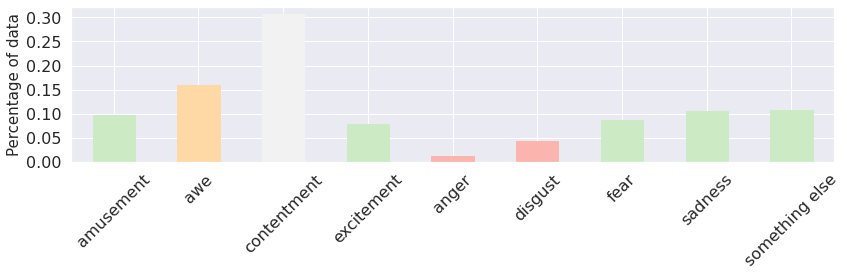

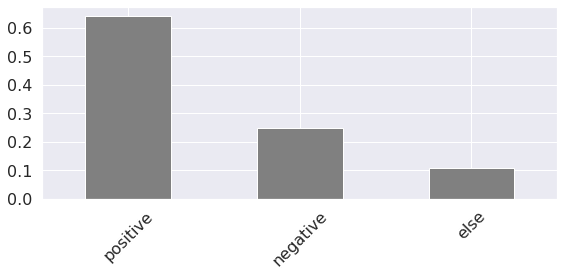

In [204]:
##
## make a histogram of the emotions
##
from artemis.analysis.emotion_centric import df_to_emotion_histogram, has_emotion_max_dominance
df_to_emotion_histogram(artemis_df)

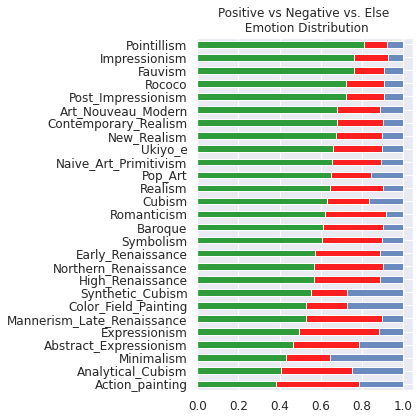

In [205]:
## Plot pos-vs-neg-vs-else as mass per art_style
from artemis.emotions import ARTEMIS_EMOTIONS, LARGER_EMOTION_VOCAB, positive_negative_else
import matplotlib.pylab as plt
artemis_df = artemis_df.assign(pne = artemis_df.emotion.apply(positive_negative_else))
def pne(group):
    "return number of positive:0, negative:1, and som-else:2 in a group"
    p = sum(group == 0)
    n = sum(group == 1)
    e = sum(group == 2)    
    return p, n, e
def pne_distribution_plot(pne_of_stim, grouping_col):
    new_stats = []
    for n, g in pne_of_stim.groupby(grouping_col):
        tc = sum([np.array(x) for x in g.values])
        tc = [i /sum(tc) for i in tc]
        new_stats.append([n, tc])

    ns = pd.DataFrame.from_dict(dict(new_stats)).T
    ns = ns.rename(columns={0:'pos', 1:'neg', 2:'else'})
    ns = ns.sort_values(by='pos')

    title = 'Positive vs Negative vs. Else \n Emotion Distribution'

    kw = {'figsize': (6, 6), 
          'fontsize': 12,
          'grid': True,
          'title': title}

    
    ns['pos'].plot(kind='barh', color='#2f9c3b', **kw)
    ns['neg'].plot(kind='barh', left=ns['pos'], color='#FE2020')
    ns['else'].plot(kind='barh', left=ns['pos']+ns['neg'], color='#6b8abd')
    
    return plt.tight_layout()

grouping_col = 'art_style'
stimuli = artemis_df.groupby([grouping_col])
pne_of_stim = stimuli.pne.apply(pne)
pne_distribution_plot(pne_of_stim, grouping_col)

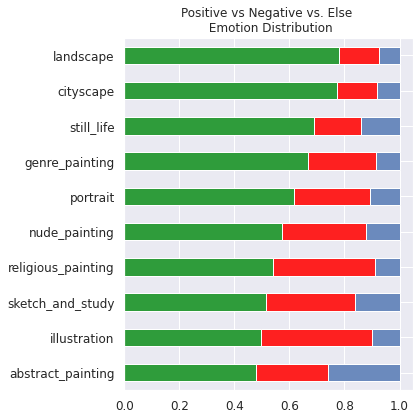

In [206]:
## Plot pos-vs-neg-vs-else as mass per genre
wikiart_genre_labels_file = '/media/data/LuoTing/local/work_space/artemis-master/artemis/data/wiki_art_genre_class.csv'
genre_info = pd.read_csv(wikiart_genre_labels_file)
df_with_genre = pd.merge(artemis_df, genre_info, on=['art_style', 'painting'])
grouping_col = 'genre'
stimuli = df_with_genre.groupby([grouping_col])
pne_of_stim = stimuli.pne.apply(pne)
pne_distribution_plot(pne_of_stim, grouping_col)

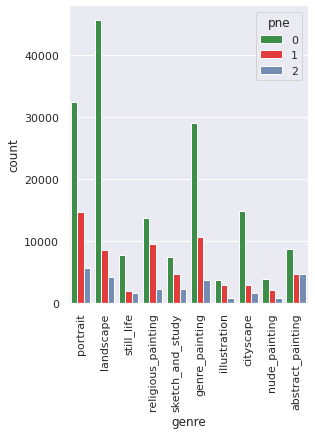

In [207]:
#
# plot pos-neg-else histogram per genre. 
# Note. Abstract paintings get most "2" (somethin-else) per proportion of their size.
#       Landscapes the most positive emotions "0".
import seaborn as sns
sns.set()
c = sns.catplot(x="genre", 
                hue="pne", 
                data=df_with_genre, 
                kind="count",                 
                palette={1: "#FE2020", 
                         0: "#2f9c3b", 
                         2: "#6b8abd"},                                
                legend_out=False)

c.set_xticklabels(rotation=90)

In [208]:
## see the normalized statistics of the above plot.
x, y = 'genre', 'pne'
df1 = df_with_genre.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)

genres=[]
pnes=[]
values=[]
for key,value in dict(df1).items():
    genre,pne=key
    genres.append(genre)
    pnes.append(pne)
    values.append(value)
data1_=pd.DataFrame({'genre':genres,'pne':pnes,'percent':values})
data1_




,genre,pne,percent
0,abstract_painting,0,48.020020
1,abstract_painting,2,26.064239
2,abstract_painting,1,25.915741
3,cityscape,0,77.184999
4,cityscape,1,14.807260
5,cityscape,2,8.007741
6,genre_painting,0,66.802392
7,genre_painting,1,24.564067
8,genre_painting,2,8.633540
9,illustration,0,49.782431


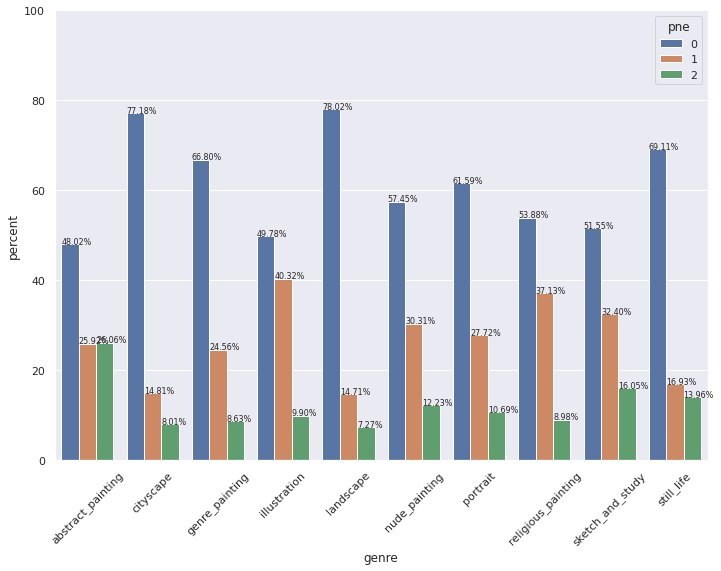

In [209]:

## plot them.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # the size of A4 paper
# df1 = df1.rename('percent').reset_index()
g = sns.barplot(x=x, y='percent', hue=y, data=data1_, ax=ax)
for item in g.get_xticklabels():
    item.set_rotation(45)
    
ax.set_ylim(0,100)
for p in ax.patches:    
    txt = '{:.2f}%'.format(p.get_height())
    txt_x = p.get_x() 
    txt_y = p.get_height() + 0.02
    ax.text(txt_x, txt_y, txt, fontsize=8)

In [218]:

path='/media/data/LuoTing/local/work_space/out/raw/data_deal_emotion_histogram.csv'
df=pd.read_csv(path)
df.emotion_histogram=df.emotion_histogram.apply(literal_eval)
count_4=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==4])
count_4

9484

In [ ]:
count_0=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==0])
count_1=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==1])
count_2=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==2])
count_3=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==3])
count_4=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==4])
count_5=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==5])
count_6=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==6])
count_7=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==7])
count_8=len([id for id,v in enumerate(df.emotion_histogram) if max(v)==8])